# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [17]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('data/human_body_temperature.csv')
%matplotlib inline

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.shape

(130, 3)

In [5]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [6]:
df.groupby('gender').count()

,temperature,heart_rate
gender,,
F,65,65
M,65,65


__2. Is the sample size large? Are the observations independent?__
There are 130 observations, evenly split between men and women. Sample size is large enough(>30). According to the given nature of data, observations are independent.

In [7]:
df.groupby('gender').mean()

,temperature,heart_rate
gender,,
F,98.393846,74.153846
M,98.104615,73.369231


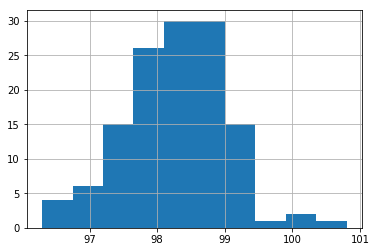

In [9]:
df.temperature.hist()

Looks like normal distribution, but the right side is skewed. Let's run a test.

In [12]:
from scipy import stats

stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

In [13]:
df.temperature.skew()

-0.0044191311689957711

P-value is greater than 0.05 and skewness is close to 0, so the distribution is normal. 

__3. Is the true population mean really 98.6 degrees F?__

Null hypothesis: population mean = 98.6 F

Alternative hypothesis: population mean != 98.6 F

__Would you use a one-sample or two-sample test? Why?__
One sample t-test. One sample t-test is used to compare the mean of a sample to a known value(population mean in our case). A two sample t-test is used to compare the means of two different samples.

__In this situation, is it appropriate to use the tt or zz statistic?__ Generally, z-tests are used when we have large sample sizes (n > 30), whereas t-tests are most helpful with a smaller sample size (n < 30). Both methods assume a normal distribution of the data, but the z-tests are most useful when the standard deviation is known. That's why we will use a t-stastic cause the population standard deviation is unknown.

In [62]:
#T-score
one_sample_test = stats.ttest_1samp(df['temperature'], 98.6)
print('t-statistic: %.10f | p-value: %.10f.' % one_sample_test)

t-statistic: -5.4548232924 | p-value: 0.0000002411.


In [63]:
# Z-score
from statsmodels.stats.weightstats import ztest
z_test = ztest(df['temperature'],value=98.6)
print('t-statistic: %.10f | p-value: %.10f.' % z_test)

t-statistic: -5.4548232924 | p-value: 0.0000000490.


The results are slightly different, both p values would result in the rejection of null hypothesis. This is because t-test and z-test are similar to each other when the sample size is large.

__4. Draw a small sample of size 10 from the data and repeat both tests.__

_Which one is the correct one to use?_ T test, according to sample size. 

In [69]:
small_sample = np.random.choice(df['temperature'], size=10)

In [73]:
#T-score
sst = stats.ttest_1samp(small_sample, 98.6)
print('t-statistic: %.4f | p-value: %.8f.' % sst)

t-statistic: -1.4137 | p-value: 0.19107937.


In [74]:
# Z-score
z_test = ztest(small_sample,value=98.6)
print("Z-score is equal to : %.4f  p-value equal to: %.8f" % z_test)

Z-score is equal to : -1.4137  p-value equal to: 0.15743564


_What do you notice? What does this tell you about the difference in application of the t and z statistic?_
For one sample of 10, the difference between z-test and t-test are larger, and can sometimes result in different conclusions depending on the alpha. T-test is more accurate than z-test on small size samples.

__5. At what temperature should we consider someone's temperature to be "abnormal"?__

In [65]:
#consider any temperature outside 95% confidence interval as 'abnormal' 
sample = np.random.choice(df['temperature'], 100000)
#bootstrap approach
ci =  np.percentile(sample, [2.5, 97.5])
print('95% confidence interval is between {} and {} degrees.'.format(ci[0], ci[1]))
print('margin of error is {:.1f} degrees.'.format((ci[1]-ci[0])/2))
#frequetist approach
ci = stats.norm.interval(0.95, np.mean(df['temperature']), np.std(df['temperature']))
print('95% confidence interval is between {:.1f} and {:.1f} degrees.'.format(ci[0], ci[1]))
print('margin of error is {:.1f} degrees.'.format((ci[1]-ci[0])/2))

95% confidence interval is between 96.7 and 99.5 degrees.
margin of error is 1.4 degrees.
95% confidence interval is between 96.8 and 99.7 degrees.
margin of error is 1.4 degrees.


__6. Is there a significant difference between males and females in normal temperature?__

H0: the difference between the body temperature of the male and female samples are not statistically significant

H1: the difference between the body temperature of the male and female samples are statistically significant

In [52]:
male = df[df.gender == 'M']['temperature']
female = df[df.gender == 'F']['temperature']

print('Male Mean:', np.mean(male))
print('Female Mean:', np.mean(female))

Male Mean: 98.1046153846154
Female Mean: 98.39384615384613


The mean body temperature of women is higher than the mean body temperature of men.

In [57]:
two_sample = stats.ttest_ind(male, female)
print(two_sample)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)


The p-value is lower then 0.05, then we reject the null hypothesis.